# IMPORT DATASETS AND LIBRARIES

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Read stock prices data
stock_price_df = pd.read_csv('/content/drive/MyDrive/A K61 NCKH/Crawl dữ liệu đầu vào /Amazon.csv')
stock_price_df

,Date,Close
0,2019-01-02,1539.130005
1,2019-01-03,1500.280029
2,2019-01-04,1575.390015
3,2019-01-07,1629.510010
4,2019-01-08,1656.579956
...,...,...
246,2019-12-23,1793.000000
247,2019-12-24,1789.209961
248,2019-12-26,1868.770020
249,2019-12-27,1869.800049


In [ ]:
import re

def clean_up_stock(text):
    text = re.sub(r'[^\w]', ' ', text)
    return text

In [ ]:
col = ['Close']
for i in col:
    stock_price_df[i] = stock_price_df[i].replace({r'\$':''}, regex = True)
    stock_price_df[i] = stock_price_df[i].astype(float)

stock_price_df

,Date,Close
0,2019-01-02,1539.130005
1,2019-01-03,1500.280029
2,2019-01-04,1575.390015
3,2019-01-07,1629.510010
4,2019-01-08,1656.579956
...,...,...
246,2019-12-23,1793.000000
247,2019-12-24,1789.209961
248,2019-12-26,1868.770020
249,2019-12-27,1869.800049


In [ ]:
df = stock_price_df.reset_index()['Close']
df = df.iloc[::1].reset_index()['Close']
df

0      1539.130005
1      1500.280029
2      1575.390015
3      1629.510010
4      1656.579956
          ...     
246    1793.000000
247    1789.209961
248    1868.770020
249    1869.800049
250    1846.890015
Name: Close, Length: 251, dtype: float64

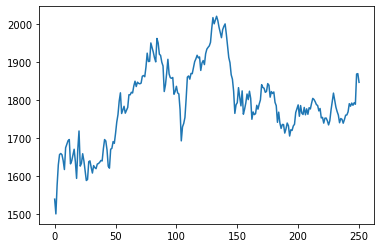

In [ ]:
plt.plot(df)

# MinMax Scaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df = scaler.fit_transform(np.array(df).reshape(-1,1))
print(df)

[[0.07460963]
 [0.        ]
 [0.14424534]
 [0.24818035]
 [0.30016696]
 [0.30562122]
 [0.29947563]
 [0.26940147]
 [0.22455866]
 [0.33469694]
 [0.35240348]
 [0.37053246]
 [0.37625538]
 [0.25328883]
 [0.26836435]
 [0.2969984 ]
 [0.32703411]
 [0.26427377]
 [0.17975453]
 [0.32676545]
 [0.41952328]
 [0.2418812 ]
 [0.25547817]
 [0.30444977]
 [0.26882524]
 [0.21910463]
 [0.16888469]
 [0.17422361]
 [0.26450422]
 [0.2683259 ]
 [0.23500606]
 [0.20677523]
 [0.24447377]
 [0.23394971]
 [0.22884124]
 [0.25211738]
 [0.25488272]
 [0.26141231]
 [0.27041913]
 [0.26799934]
 [0.3292619 ]
 [0.37619794]
 [0.36901546]
 [0.32392298]
 [0.24134342]
 [0.23145326]
 [0.32713022]
 [0.33189291]
 [0.36590433]
 [0.35708927]
 [0.40728999]
 [0.46450042]
 [0.50233329]
 [0.57035588]
 [0.61258667]
 [0.5079411 ]
 [0.5261662 ]
 [0.54441052]
 [0.50972699]
 [0.52455308]
 [0.53862993]
 [0.60284983]
 [0.60244661]
 [0.61535201]
 [0.61181844]
 [0.6471933 ]
 [0.67135254]
 [0.64442773]
 [0.66649374]
 [0.66023303]
 [0.65829359]
 [0.66

# Splitting Data to train test

In [ ]:
training_size = int(len(df) * 0.8)
test_size = len(df) - training_size
train_data, test_data = df[0:training_size,:], df[training_size:len(df),:1]

In [ ]:
# Convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
time_step = 10
feature = 1
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)


In [ ]:
# Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , feature)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , feature)

In [ ]:
### Create the Stacked LSTM model

from tensorflow.python.keras.layers import Dense, LSTM
from tensorflow.python.keras.models import Sequential

In [ ]:
model= Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(time_step, feature)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10, 50)            10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 10, 50)            20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
3/3 [==============================] - 9s 473ms/step - loss: 0.3320 - val_loss: 0.1854
Epoch 2/100
3/3 [==============================] - 0s 57ms/step - loss: 0.2115 - val_loss: 0.0911
Epoch 3/100
3/3 [==============================] - 0s 57ms/step - loss: 0.0912 - val_loss: 0.0127
Epoch 4/100
3/3 [==============================] - 0s 63ms/step - loss: 0.0198 - val_loss: 0.0347
Epoch 5/100
3/3 [==============================] - 0s 54ms/step - loss: 0.0509 - val_loss: 0.0351
Epoch 6/100
3/3 [==============================] - 0s 53ms/step - loss: 0.0286 - val_loss: 0.0055
Epoch 7/100
3/3 [==============================] - 0s 54ms/step - loss: 0.0146 - val_loss: 0.0074
Epoch 8/100
3/3 [==============================] - 0s 54ms/step - loss: 0.0222 - val_loss: 0.0107
Epoch 9/100
3/3 [==============================] - 0s 53ms/step - loss: 0.0242 - val_loss: 0.0072
Epoch 10/100
3/3 [==============================] - 0s 56ms/step - loss: 0.0173 - val_loss: 0.0040
Epoch 11/100
3/3 [

In [ ]:
# Prediction and check performances
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
# Inverse transform to original close price
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
# # Calculate RMSE performance metrics
# import math
# from sklearn.metrics import mean_squared_error
# math.sqrt(mean_squared_error(y_train,train_predict))
import math
from sklearn.metrics import mean_absolute_error, accuracy_score
math.sqrt(mean_absolute_error(y_train,train_predict))

42.5168145856268

In [ ]:
# Test Data MAE
math.sqrt(mean_absolute_error(y_test,test_predict))

42.235123403369634

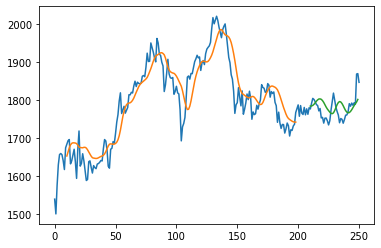

In [ ]:
### Plotting
# shift train predictions for plotting
look_back=10
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data)

51

In [ ]:
x_input=test_data[41:].reshape(1,-1)
x_input.shape
x_input

array([[0.51646781, 0.55766171, 0.54492908, 0.56077283, 0.54967255,
        0.5621555 , 0.55487691, 0.70766841, 0.70964654, 0.66564885]])

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[0.5164678070617978,
 0.5576617054914883,
 0.5449290800758431,
 0.5607728330648323,
 0.5496725474346733,
 0.5621555043350894,
 0.5548769052169233,
 0.7076684102046671,
 0.7096465350229835,
 0.665648847445738]

In [ ]:
# Prediction for next 30 days

lst_output=[]
n_steps=10
i=0
while(i<30):

    if len(temp_input)>10:
        # Shifting x_input to next day
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        # Predict next day
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


[0.617515]
11
1 day input [0.55766171 0.54492908 0.56077283 0.54967255 0.5621555  0.55487691
 0.70766841 0.70964654 0.66564885 0.61751503]
1 day output [[0.6345599]]
2 day input [0.54492908 0.56077283 0.54967255 0.5621555  0.55487691 0.70766841
 0.70964654 0.66564885 0.61751503 0.63455993]
2 day output [[0.6472883]]
3 day input [0.56077283 0.54967255 0.5621555  0.55487691 0.70766841 0.70964654
 0.66564885 0.61751503 0.63455993 0.64728832]
3 day output [[0.6560981]]
4 day input [0.54967255 0.5621555  0.55487691 0.70766841 0.70964654 0.66564885
 0.61751503 0.63455993 0.64728832 0.65609813]
4 day output [[0.6615598]]
5 day input [0.5621555  0.55487691 0.70766841 0.70964654 0.66564885 0.61751503
 0.63455993 0.64728832 0.65609813 0.66155982]
5 day output [[0.66458905]]
6 day input [0.55487691 0.70766841 0.70964654 0.66564885 0.61751503 0.63455993
 0.64728832 0.65609813 0.66155982 0.66458905]
6 day output [[0.6659379]]
7 day input [0.70766841 0.70964654 0.66564885 0.61751503 0.63455993 0.647

In [ ]:
print(lst_output)

[[0.6175150275230408], [0.6345599293708801], [0.6472883224487305], [0.6560981273651123], [0.6615598201751709], [0.6645890474319458], [0.6659379005432129], [0.6661763787269592], [0.6675392985343933], [0.6704239249229431], [0.6738226413726807], [0.6766955852508545], [0.6789678335189819], [0.6810175776481628], [0.6830424070358276], [0.6851091384887695], [0.6872085332870483], [0.6892966032028198], [0.6913213133811951], [0.6932576298713684], [0.6951171159744263], [0.6969242095947266], [0.6986929178237915], [0.7004231214523315], [0.7021097540855408], [0.7037493586540222], [0.7053414583206177], [0.7068877816200256], [0.7083908319473267], [0.7098526954650879]]


In [ ]:
day_new=np.arange(1,11)
day_pred=np.arange(11,41)

In [ ]:
len(df)

251

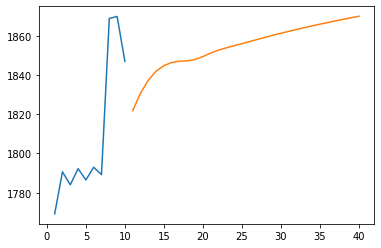

In [ ]:
# Plot real 100 close value
plt.plot(day_new,scaler.inverse_transform(df[241:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [ ]:
df_new=df.tolist()
df_new.extend(lst_output)
df_new

[[0.07460962628022516],
 [0.0],
 [0.14424533998991018],
 [0.24818035022045848],
 [0.300166961423987],
 [0.30562122215199716],
 [0.29947562578885867],
 [0.2694014707233774],
 [0.22455866108284406],
 [0.33469693758709074],
 [0.3524034755732761],
 [0.3705324573758406],
 [0.37625537549206944],
 [0.2532888259156385],
 [0.26836435005541937],
 [0.29699839837061415],
 [0.3270341068290552],
 [0.26427377172467725],
 [0.17975453247988105],
 [0.3267654494408361],
 [0.41952328082714585],
 [0.24188120185969053],
 [0.2554781726421447],
 [0.30444977278992935],
 [0.26882524047883827],
 [0.21910463478536446],
 [0.16888469206143197],
 [0.1742236129683219],
 [0.2645042169363867],
 [0.26832590344837914],
 [0.235006057684914],
 [0.20677522988257824],
 [0.24447376909905527],
 [0.23394971371343587],
 [0.2288412380182554],
 [0.25211737655357114],
 [0.25488271909408544],
 [0.26141231266656284],
 [0.27041913365728476],
 [0.2679993417190696],
 [0.3292619001626007],
 [0.3761979400120401],
 [0.3690154574114741],
 [

In [ ]:
df=scaler.inverse_transform(df).tolist()

In [ ]:
len(df_new)

281

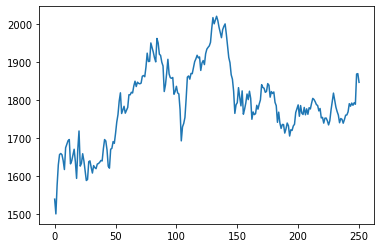

In [ ]:
plt.plot(df)

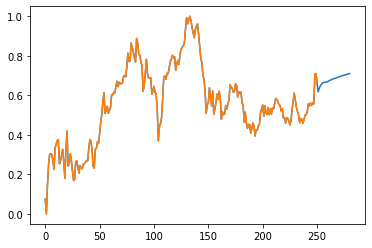

In [ ]:
# df_new=scaler.inverse_transform(df_new).tolist()
df = scaler.fit_transform(np.array(df).reshape(-1,1))
df_new = scaler.fit_transform(np.array(df_new).reshape(-1,1))
plt.plot(df_new)
plt.plot(df)